# CE-40717: Machine Learning

## HW6-Gradient Boosting

### Installation:
You can use [sklearn](https://scikit-learn.org) and [xgboost](https://xgboost.readthedocs.io) packages:
```python
!pip install -U scikit-learn
!pip install xgboost
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from time import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix, confusion_matrix

### Load & Prepare Dataset:

In [2]:
np.random.seed(seed=42)

# load dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target


# preprocess(if you need):


# split dataset to train set and validation set:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

data_train = xgb.DMatrix(data=x_train, label=y_train)
data_val = xgb.DMatrix(data=x_val, label=y_val)

n_val = len(x_val)
class_names = iris.target_names
print(n_val, class_names)

15 ['setosa' 'versicolor' 'virginica']


### Set Hyperparameter for Both Gradine Boost & XGboost:

In [3]:
# Gradine Boost:
GB_param = dict(n_estimators=5,
                learning_rate=0.01,
                max_depth=3,
                random_state=0)

# XGboost:
XGboost_param = {"eta": 0.3,
                 "objective": "multi:softprob",
                 "use_label_encoder" : False,
                 "num_class": 3,
                 "max_depth": 3}

num_round = 5

### Define Classifiers:

In [4]:
# define classifier for gradient boost:
GB_clf = GradientBoostingClassifier(**GB_param)

# define classifier for XGboost:
XGboost_clf = xgb.XGBClassifier(**XGboost_param)

### Train Both Classifiers:

In [5]:
# train  gradient boost:
tic = time()
trained_GB = GB_clf.fit(x_train, y_train)
toc = time()

# calculate training time for GB:
GB_train_time = toc - tic
print(f"GB_train_time: {1000.0*GB_train_time} millisecond")


# train XGboost:
tic = time()
trained_XGboost = XGboost_clf.fit(x_train, y_train)
toc = time()

# calculate training time for XGboost:
XGboost_train_time = toc - tic
print(f"XGboost_train_time: {1000.0*XGboost_train_time} millisecond")

GB_train_time: 10.257244110107422 millisecond
[23:24:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost_train_time: 1550.4770278930664 millisecond


### Prediction on Validation Set:

In [6]:
# prediction for gradient boost:
tic = time()
y_pred_GB = GB_clf.predict(x_val)
toc = time()

# calculate validation time per data for GB:
GB_val_time_per_data = (toc - tic) / n_val
print(f"GB_val_time_per_data: {1000.0*GB_val_time_per_data} millisecond")


# prediction for XGboost:
tic = time()
y_pred_XGboost = XGboost_clf.predict(x_val)
toc = time()

# calculate validation time per data for XGboost:
XGboost_val_time_per_data = (toc - tic) / n_val
print(f"XGboost_val_time_per_data: {1000.0*XGboost_val_time_per_data} millisecond")

GB_val_time_per_data: 0.06971359252929688 millisecond
XGboost_val_time_per_data: 1.0810534159342446 millisecond


### Evaluation (precision - recall - F1 score - confusion matrix):

#### for Gradient Boost:

In [7]:
# calculate precision
precision_GB = precision_score(y_val , y_pred_GB , average='micro')

print(f"precision_GB: {precision_GB}")

precision_GB: 1.0


In [8]:
# calculate recall
recall_GB = recall_score(y_val , y_pred_GB , average='micro')

print(f"recall_GB: {recall_GB}")

recall_GB: 1.0


In [9]:
# calculate F1 score
f1_GB = f1_score(y_val , y_pred_GB , average='micro')

print(f"F1_GB: {f1_GB}")

F1_GB: 1.0


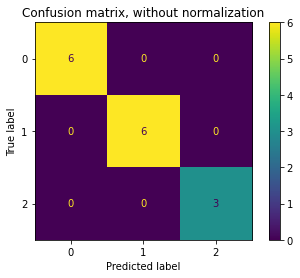

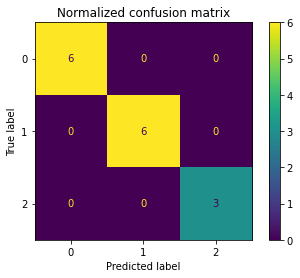

In [10]:
# calculate confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(GB_clf , x_val , y_val)
    disp.ax_.set_title(title)

plt.show()

#### for XGboost:

In [11]:
# calculate precision
precision_XGboost = precision_score(y_val , y_pred_XGboost , average='micro')

print(f"precision_XGboost: {precision_XGboost}")

precision_XGboost: 1.0


In [12]:
# calculate recall
recall_XGboost = recall_score(y_val , y_pred_XGboost , average='micro')

print(f"recall_XGboost: {recall_XGboost}")

recall_XGboost: 1.0


In [13]:
# calculate F1 score
f1_XGboost = f1_score(y_val , y_pred_XGboost , average='micro')

print(f"F1_XGboost: {f1_XGboost}")

F1_XGboost: 1.0


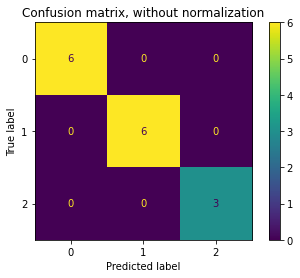

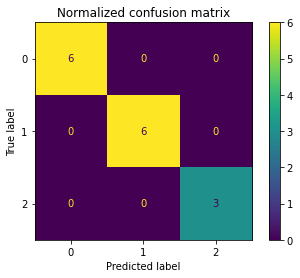

In [14]:
# calculate confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(XGboost_clf , x_val , y_val)
    disp.ax_.set_title(title)

plt.show()

### Compare Gradient Boost & XGboost Algorithm According to Evaluation Part Results:

Write your analysis here: 

<div style="direction:rtl">
با توجه به اینکه هر دو الگوریتم دقت برابری روی این مجموعه‌داده‌ها دارند نمیتوان دقت آن‌ها را مقایسه کرد. ولی از لحاظ زمان آموزش و آزمون، الگوریتم
    Gradient Boosting
الگوریتم بهتری‌است و خصوصا هنگام آزمون چندین برابر سرعت بیشتری از 
    XGBoost
    دارد
</div>